# Audiobooks Customer Return Prediction

We are going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Modelling using Deep Neural Network 

## Problem Defition

This notebook is to practice the business case study explored in the *The Data Science Course 2023: Complete Data Science Bootcamp* on [Udemy](https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp/). We'll use `pandas` to wrangle and `under_sampling` to balance the data instead of manual operations explained in the course.

You are given data from an audiobook app. Logically, it relates to the audio version of books only. Each customer in the database has made a purchase at least once. We want to create a machine learning algorithm based on our data that can predict if a customer will buy again from the audiobook company.

## Data

The sample dataset is taken from the *Section 51: Deep Learning - Business Case Example* of *The Data Science Course 2023: Complete Data Science Bootcamp* on [Udemy](https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp/). The dataset has 12 columns features to be used predicting the label which is Target columns in the dataset. You can see the data dictionary [here](Data/README.md).

## Evaluation

> If we can reach more than 80% accuracy at predicting whether or not a customer is going to come back and purchase new audiobook, we'll pursue the project.

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
⚠️ Note: Due to the nature of experimentation, the evaluation metric may change over time.
</div>

## Import Libraries

We're going to use:
- [pandas](https://pandas.pydata.org/) for data analysis.
- [NumPy](https://numpy.org/) for numerical operations.
- [Matplotlib](https://matplotlib.org/) / [seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
- [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import seaborn as sb
sb.set(style="ticks")

# Preprocessing the data
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# DNN Related Keras Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model

# Linear Model to compare the performance of DNN
from sklearn.linear_model import LogisticRegression

# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_auc_score, roc_curve

# Save the model
import joblib

## Load Data

In [2]:
columns = ['ID', 'Book length (mins)_overall', 'Book length (mins)_avg', 
           'Price_overall', 'Price_avg', 'Review', 'Review 10/10', 
           'Minutes listened', 'Completion', 'Support Requests',
           'Last visited minus Purchase date', 'Targets']
df = pd.read_csv('Data/Audiobooks_data.csv', header=None)
df.columns = columns
df.shape

(14084, 12)

## Data Exploration (Exploratory Data Analysis - EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,ID,Book length (mins)_overall,Book length (mins)_avg,Price_overall,Price_avg,Review,Review 10/10,Minutes listened,Completion,Support Requests,Last visited minus Purchase date,Targets
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0


In [4]:
df.tail()

,ID,Book length (mins)_overall,Book length (mins)_avg,Price_overall,Price_avg,Review,Review 10/10,Minutes listened,Completion,Support Requests,Last visited minus Purchase date,Targets
14079,28220,1620.0,1620,5.33,5.33,1,9.00,0.61,988.2,0,4,0
14080,28671,1080.0,1080,6.55,6.55,1,6.00,0.29,313.2,0,29,0
14081,31134,2160.0,2160,6.14,6.14,0,8.91,0.00,0.0,0,0,0
14082,32832,1620.0,1620,5.33,5.33,1,8.00,0.38,615.6,0,90,0
14083,251,1674.0,3348,5.33,10.67,0,8.91,0.00,0.0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                14084 non-null  int64  
 1   Book length (mins)_overall        14084 non-null  float64
 2   Book length (mins)_avg            14084 non-null  int64  
 3   Price_overall                     14084 non-null  float64
 4   Price_avg                         14084 non-null  float64
 5   Review                            14084 non-null  int64  
 6   Review 10/10                      14084 non-null  float64
 7   Minutes listened                  14084 non-null  float64
 8   Completion                        14084 non-null  float64
 9   Support Requests                  14084 non-null  int64  
 10  Last visited minus Purchase date  14084 non-null  int64  
 11  Targets                           14084 non-null  int64  
dtypes: f

✍🏼 No Null values

### Distribution of Targets

In [6]:
df['Targets'].value_counts()

0    11847
1     2237
Name: Targets, dtype: int64

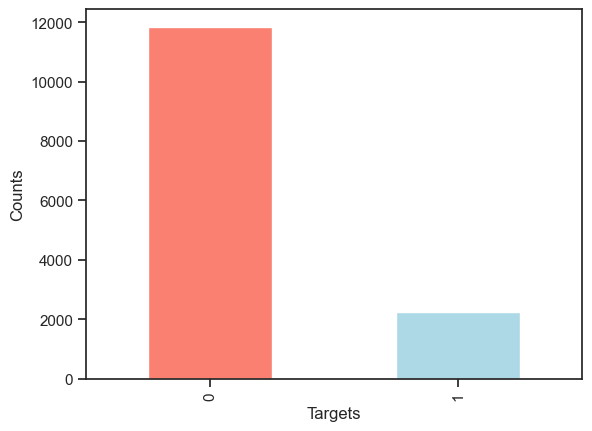

In [7]:
df['Targets'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.xlabel('Targets')
plt.ylabel('Counts')
plt.show()

✍🏼 Needs balancing

### Distribution of Price_overall

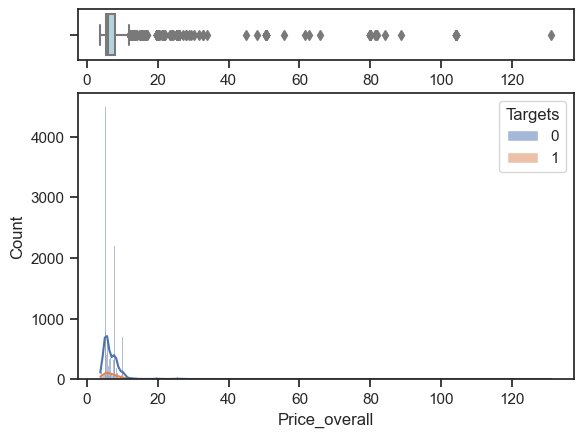

In [8]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={'height_ratios':(0.15, 0.85)})

sb.boxplot(data=df, x='Price_overall', color='lightblue', ax=ax_box)
sb.histplot(data=df, x='Price_overall', hue='Targets', kde=True, ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

### Distribution of Completion

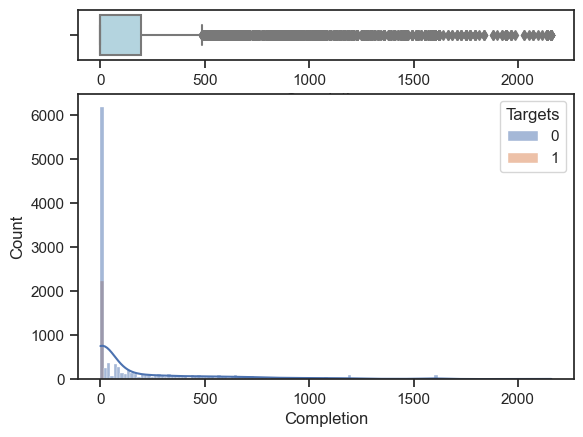

In [9]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={'height_ratios':(0.15, 0.85)})

sb.boxplot(data=df, x='Completion', color='lightblue', ax=ax_box)
sb.histplot(data=df, x='Completion', hue='Targets', kde=True, ax=ax_hist)
plt.show()

### Distribution of Review

<AxesSubplot: xlabel='Review', ylabel='count'>

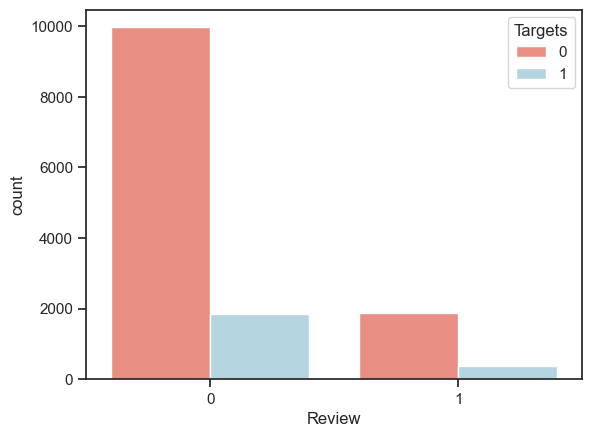

In [10]:
sb.countplot(data=df, x='Review', hue='Targets', palette=['salmon', 'lightblue'])

## Data Preprocessing

### Drop the columns that we'll not use

In [11]:
df.drop(['ID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Book length (mins)_overall        14084 non-null  float64
 1   Book length (mins)_avg            14084 non-null  int64  
 2   Price_overall                     14084 non-null  float64
 3   Price_avg                         14084 non-null  float64
 4   Review                            14084 non-null  int64  
 5   Review 10/10                      14084 non-null  float64
 6   Minutes listened                  14084 non-null  float64
 7   Completion                        14084 non-null  float64
 8   Support Requests                  14084 non-null  int64  
 9   Last visited minus Purchase date  14084 non-null  int64  
 10  Targets                           14084 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.2 MB


### Determine the Features and Targets

In [12]:
x = df.drop('Targets', axis=1)
y = df['Targets']

### Balancing the Dataset

We'll use `RandomUnderSampler` from `imblearn` library. We'll set `random_state` parameter to `101` for reproducing purpose. Also, `sampling_strategy` will be set to `majority` which will undersample the majority class determined by the class with the largest number of examples.

0    2237
1    2237
Name: Targets, dtype: int64


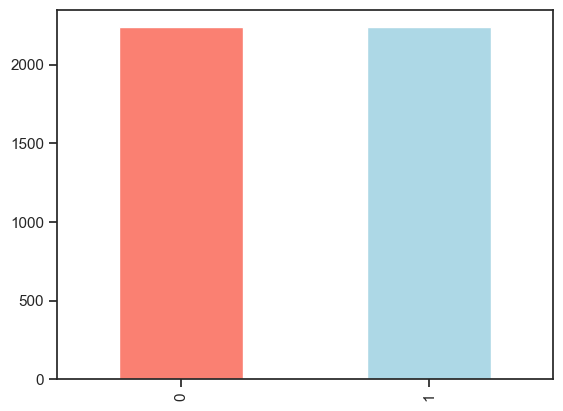

In [13]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=101)

x_under, y_under = undersample.fit_resample(x, y)

print(y_under.value_counts())

y_under.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.show()

### Splitting Data

We'll resevre 10% of the data for tesing. Then we'll use the 10% for validating the training of at the end of each epoch.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.1, random_state=101, shuffle=True)

## Modelling

In [15]:
def create_model():
    input_size = 10
    output_size = 2
    hidden_layer_size = 50
    
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_shape=(input_size, ), activation='relu'))
    model.add(Dense(hidden_layer_size, activation='relu'))
    model.add(Dense(output_size, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Below commands graphically summarize the deep neural model
    # Create a NetworkX graph
    G = nx.Graph()

    # Add nodes and display the number of nodes for each layer
    for i, layer in enumerate(model.layers):
        layer_name = layer.name
        num_nodes = layer.output_shape[-1]
        G.add_node(layer_name, num_nodes=num_nodes)
        print(f"Layer: {layer_name}, Number of Nodes: {num_nodes}")

    # Add edges
    for i in range(len(model.layers) - 1):
        G.add_edge(model.layers[i].name, model.layers[i+1].name)

    # Visualize the graph with node annotations
    pos = nx.spring_layout(G, scale=0.2)  # Adjust the layout if needed
    nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=1000)
    node_labels = nx.get_node_attributes(G, 'num_nodes')
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='black', font_size=10)

    plt.show()
    
    return model

In [16]:
def train_model(x_train, y_train):
    model = create_model()
    batch_size = 100
    max_epochs = 100

    early_stop = EarlyStopping(monitor='val_loss', patience=5)

    history = model.fit(x_train, y_train, verbose=2, validation_split=0.1, 
                        batch_size=batch_size, epochs=max_epochs, callbacks=[early_stop])
    # Save the trained model to disk
    joblib.dump(model, 'trained_model.joblib')
    
    plot_history(history)

In [17]:
def plot_history(history):
    fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(12, 6))
    ax_loss.plot(history.history['loss'])
    ax_loss.plot(history.history['val_loss'])
    ax_loss.set_xlabel('Epochs')
    ax_loss.set_ylabel('Loss')
    ax_loss.legend(['Training', 'Validation'], loc='upper right')
    
    ax_acc.plot(history.history['accuracy'])
    ax_acc.plot(history.history['val_accuracy'])
    ax_acc.set_xlabel('Epochs')
    ax_acc.set_ylabel('Loss')
    ax_acc.legend(['Training', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.show()

Layer: dense, Number of Nodes: 50
Layer: dense_1, Number of Nodes: 50
Layer: dense_2, Number of Nodes: 2


2023-05-19 21:53:41.959473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


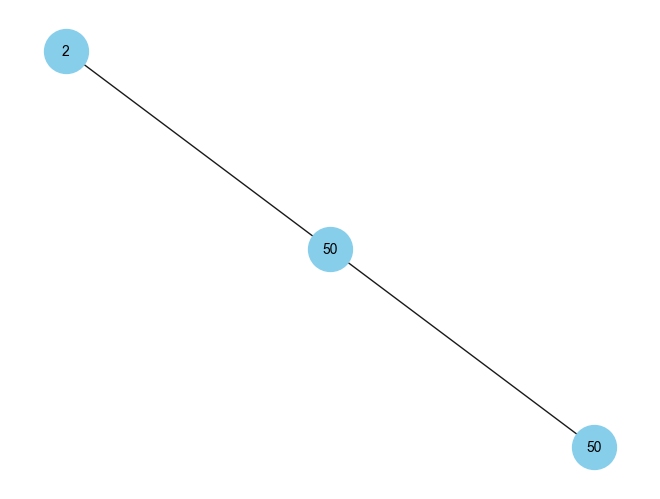

Epoch 1/100
37/37 - 0s - loss: 48.4645 - accuracy: 0.5644 - val_loss: 3.4906 - val_accuracy: 0.6402 - 306ms/epoch - 8ms/step
Epoch 2/100
37/37 - 0s - loss: 1.1569 - accuracy: 0.7094 - val_loss: 0.5294 - val_accuracy: 0.7444 - 41ms/epoch - 1ms/step
Epoch 3/100
37/37 - 0s - loss: 0.5334 - accuracy: 0.7331 - val_loss: 0.4958 - val_accuracy: 0.7444 - 39ms/epoch - 1ms/step
Epoch 4/100
37/37 - 0s - loss: 0.5682 - accuracy: 0.7325 - val_loss: 0.4749 - val_accuracy: 0.7767 - 39ms/epoch - 1ms/step
Epoch 5/100
37/37 - 0s - loss: 0.5026 - accuracy: 0.7472 - val_loss: 0.8181 - val_accuracy: 0.6328 - 37ms/epoch - 1ms/step
Epoch 6/100
37/37 - 0s - loss: 0.6975 - accuracy: 0.7160 - val_loss: 1.5055 - val_accuracy: 0.6228 - 40ms/epoch - 1ms/step
Epoch 7/100
37/37 - 0s - loss: 1.5878 - accuracy: 0.6856 - val_loss: 1.2955 - val_accuracy: 0.7072 - 37ms/epoch - 987us/step
Epoch 8/100
37/37 - 0s - loss: 1.0748 - accuracy: 0.7187 - val_loss: 0.5840 - val_accuracy: 0.6948 - 36ms/epoch - 980us/step
Epoch 9/10

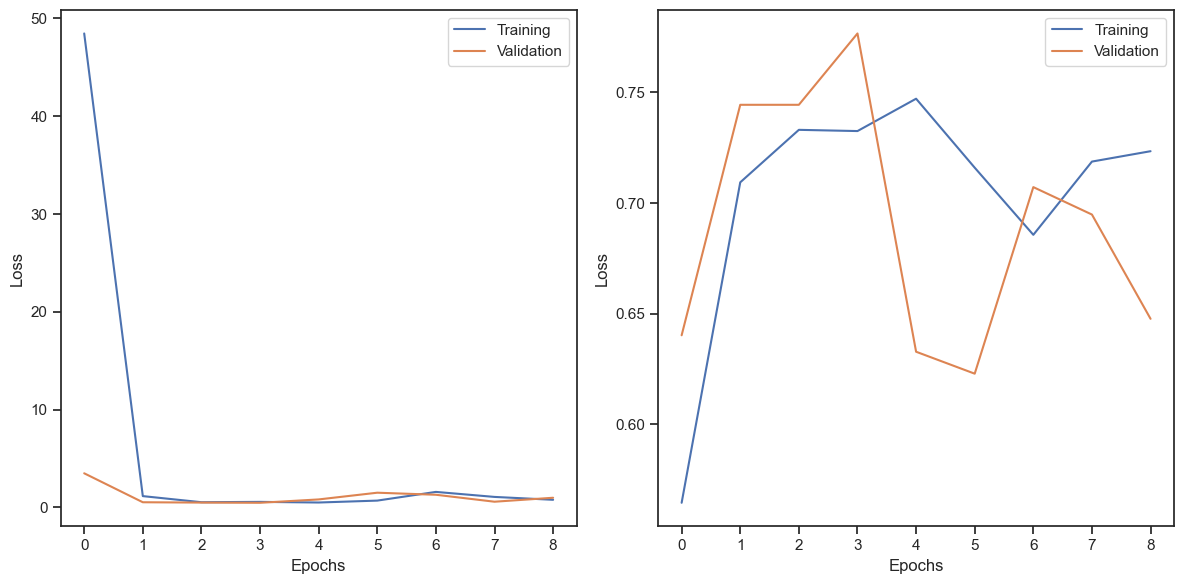

In [18]:
train_model(x_train.values, y_train.values)

### Standardize the inputs

Let's check if standardizing the inputs will improve the prediction performance of the model.

In [19]:
scaler = StandardScaler()

x_train_scaled = scaler.fit(x_train.values)
x_train_scaled = scaler.transform(x_train.values)
x_test_scaled = scaler.transform(x_test.values)

Layer: dense_3, Number of Nodes: 50
Layer: dense_4, Number of Nodes: 50
Layer: dense_5, Number of Nodes: 2


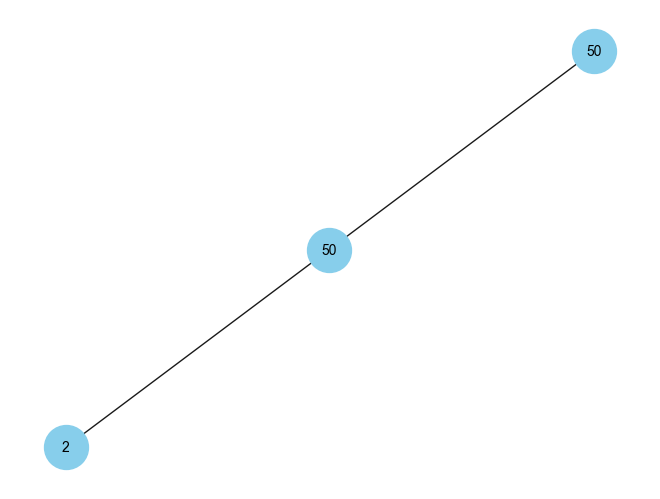

Epoch 1/100
37/37 - 0s - loss: 0.5957 - accuracy: 0.6900 - val_loss: 0.5371 - val_accuracy: 0.7593 - 253ms/epoch - 7ms/step
Epoch 2/100
37/37 - 0s - loss: 0.4663 - accuracy: 0.7676 - val_loss: 0.4541 - val_accuracy: 0.7767 - 39ms/epoch - 1ms/step
Epoch 3/100
37/37 - 0s - loss: 0.4182 - accuracy: 0.7817 - val_loss: 0.4124 - val_accuracy: 0.7916 - 38ms/epoch - 1ms/step
Epoch 4/100
37/37 - 0s - loss: 0.3963 - accuracy: 0.7922 - val_loss: 0.3931 - val_accuracy: 0.7990 - 37ms/epoch - 1ms/step
Epoch 5/100
37/37 - 0s - loss: 0.3844 - accuracy: 0.7971 - val_loss: 0.3898 - val_accuracy: 0.7816 - 38ms/epoch - 1ms/step
Epoch 6/100
37/37 - 0s - loss: 0.3782 - accuracy: 0.8038 - val_loss: 0.3841 - val_accuracy: 0.8114 - 60ms/epoch - 2ms/step
Epoch 7/100
37/37 - 0s - loss: 0.3719 - accuracy: 0.8015 - val_loss: 0.3853 - val_accuracy: 0.7940 - 37ms/epoch - 993us/step
Epoch 8/100
37/37 - 0s - loss: 0.3710 - accuracy: 0.8029 - val_loss: 0.3734 - val_accuracy: 0.7866 - 38ms/epoch - 1ms/step
Epoch 9/100
3

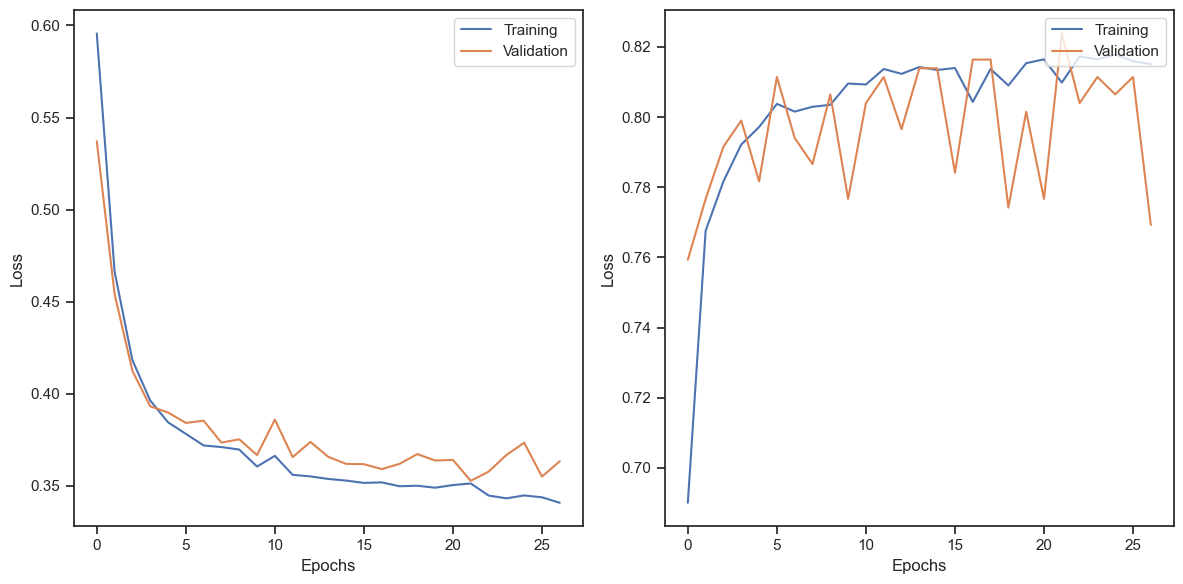

In [20]:
train_model(x_train_scaled, y_train.values)

## Testing Model

In [21]:
# Load the trained model from disk
model = joblib.load('trained_model.joblib')

test_loss, test_acc = model.evaluate(x_test_scaled, y_test.values)

print('\nTest Loss: {0:.2f} and Test Accuracy: {1:.2f}%'.format(test_loss, test_acc*100))

14/14 [==============================] - 0s 558us/step - loss: 0.3624 - accuracy: 0.7991

Test Loss: 0.36 and Test Accuracy: 79.91%


### Classification Report

In [22]:
y_pred = model.predict(x_test_scaled)
y_pred = np.argmax(y_pred, axis=1) # to turn the probabilities into binary classes
# Print classification report
print(classification_report(y_test, y_pred))

14/14 [==============================] - 0s 495us/step
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       224
           1       0.79      0.82      0.80       224

    accuracy                           0.80       448
   macro avg       0.80      0.80      0.80       448
weighted avg       0.80      0.80      0.80       448



### Confusion Matrix

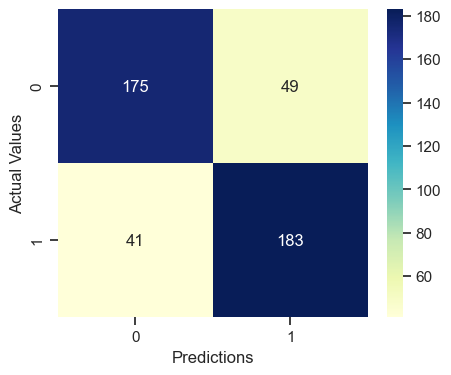

In [23]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5,4))
sb.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()

### ROC Curve and AUC Score

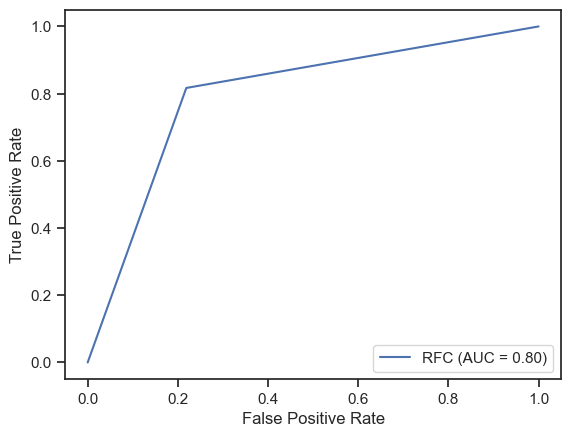

In [24]:
# Import ROC curve function from metrics module
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RFC')
display.plot()
plt.show()

## Logistic Regression

Let's compare the performance of proposed model with Logistic Regression (LR)

In [25]:
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(x_train_scaled, y_train.values)

y_hat = model_lr.predict(x_test_scaled)
acc = accuracy_score(y_test.values, y_hat)

print("Accuracy: {0:.2f}%".format(acc*100))

Accuracy: 79.02%


<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
✍🏼 Note: As you can see above the Logistic Regression algorithm performs slightly worse than the DNN model.
</div>

## Conclusion and Future Work

Based on initial testing, the DNN model shows a slight performance advantage over the Logistic Regression model for the binary classification problem. DNN model seems promising for this task. Further hyperparameter tuning may improve the model's performance. Removing the noise of the data can also positive impact on the performance.
